In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("data/CH-CHA_FP2025.3_2005-2024_81.1_FLUXES_M15_MGMT_L4.2_NEE_GPP_RECO_LE_H_FN2O_FCH4_20250516.csv")


cols = [
    # Target
    "FN2O_L3.1_L3.3_CUT_50_QCF0",

    # Predictors
    "NEE_L3.1_L3.3_CUT_50_QCF_gfRF",
    "GPP_NT_CUT_50_gfRF",
    "RECO_NT_CUT_50_gfRF",
    "SW_IN_T1_2_1",
    "TA_T1_2_1",
    "PREC_RAIN_TOT_GF1_0.5_1",
    "VPD_T1_2_1",
    "SWC_GF1_0.05_1",
    "SWC_GF1_0.15_1",
    "TS_GF1_0.04_1",
    "TS_GF1_0.15_1",
    "MGMT_MOWING",
    "MGMT_FERT_ORG",
    "MGMT_FERT_MIN",
    "MGMT_GRAZING",
    "MGMT_SOILCULTIVATION"
]

chamau = df[cols]

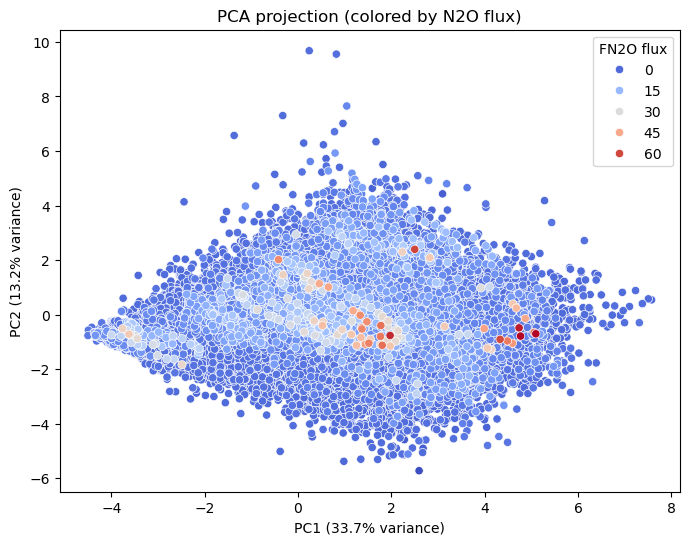

In [13]:
chamau_clean = chamau.dropna()
chamau_clean = chamau_clean.sort_values(
    by="FN2O_L3.1_L3.3_CUT_50_QCF0",
    ascending=True  # ascending puts zeros first, descending puts them last
)

X = chamau_clean.drop(columns=["FN2O_L3.1_L3.3_CUT_50_QCF0"])
y = chamau_clean["FN2O_L3.1_L3.3_CUT_50_QCF0"]

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize predictors
X_scaled = StandardScaler().fit_transform(X)

# Run PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df["FN2O"] = y.values

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="FN2O", palette="coolwarm")
plt.title("PCA projection (colored by N2O flux)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(title="FN2O flux", loc="best")
plt.show()


In [8]:
loadings = pd.DataFrame(import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (Pearson by default)
corr = df_filtered.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr, 
    annot=True, fmt=".2f", cmap="coolwarm",
    cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation matrix (including target FN2O)")
plt.tight_layout()
plt.show()

    pca.components_.T,
    index=X.columns,
    columns=["PC1", "PC2"]
)
print(loadings.sort_values("PC1", ascending=False))

                                    PC1       PC2
TA_T1_2_1                      0.401228  0.065236
RECO_NT_CUT_50_gfRF            0.389408  0.137646
TS_GF1_0.04_1                  0.380410  0.190357
TS_GF1_0.15_1                  0.360977  0.224282
VPD_T1_2_1                     0.309884 -0.084114
SW_IN_T1_2_1                   0.301707 -0.360965
GPP_NT_CUT_50_gfRF             0.275910 -0.470882
MGMT_MOWING                    0.053716 -0.005072
MGMT_FERT_ORG                  0.041809  0.102758
MGMT_FERT_MIN                  0.006607 -0.021324
MGMT_SOILCULTIVATION          -0.007743  0.015824
PREC_RAIN_TOT_GF1_0.5_1       -0.019935  0.203348
MGMT_GRAZING                  -0.041335 -0.017629
NEE_L3.1_L3.3_CUT_50_QCF_gfRF -0.180133  0.562799
SWC_GF1_0.15_1                -0.220877 -0.293073
SWC_GF1_0.05_1                -0.247189 -0.274905


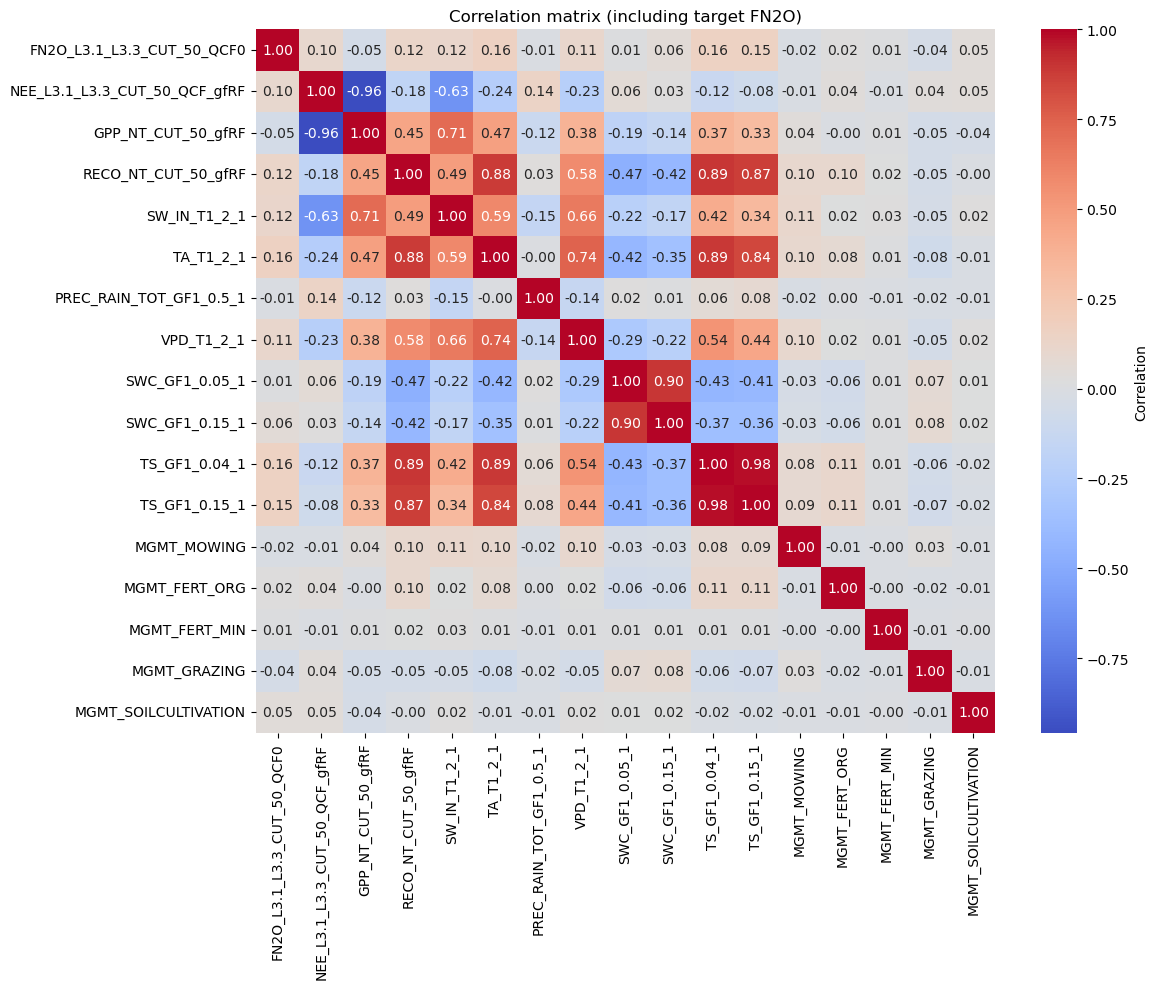

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (Pearson by default)
corr = chamau_clean.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr, 
    annot=True, fmt=".2f", cmap="coolwarm",
    cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation matrix (including target FN2O)")
plt.tight_layout()
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler

# Drop or fill NaNs
X = X.dropna()
y = y.loc[X.index]

# Scale predictors
X_scaled = StandardScaler().fit_transform(X)


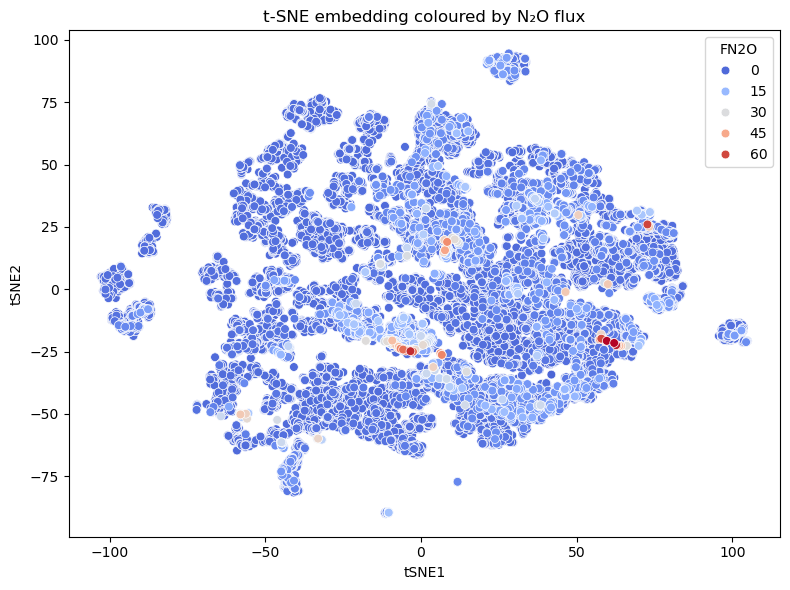

In [29]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=90, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=["tSNE1", "tSNE2"])
tsne_df["FN2O"] = y.values

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_df, x="tSNE1", y="tSNE2",
    hue="FN2O", palette="coolwarm", s=40
)
plt.title("t-SNE embedding coloured by N₂O flux")
plt.tight_layout()
plt.show()
